In [2]:
from src import create_simple_plot_with_tables, BS468ReferenceResponse, plot_bs468_response_with_tables, weighting_filter_response
from src import verify_exact_values, plot_accurate_response, generate_calibration_table, export_for_filter_design
from scipy import stats

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Введение

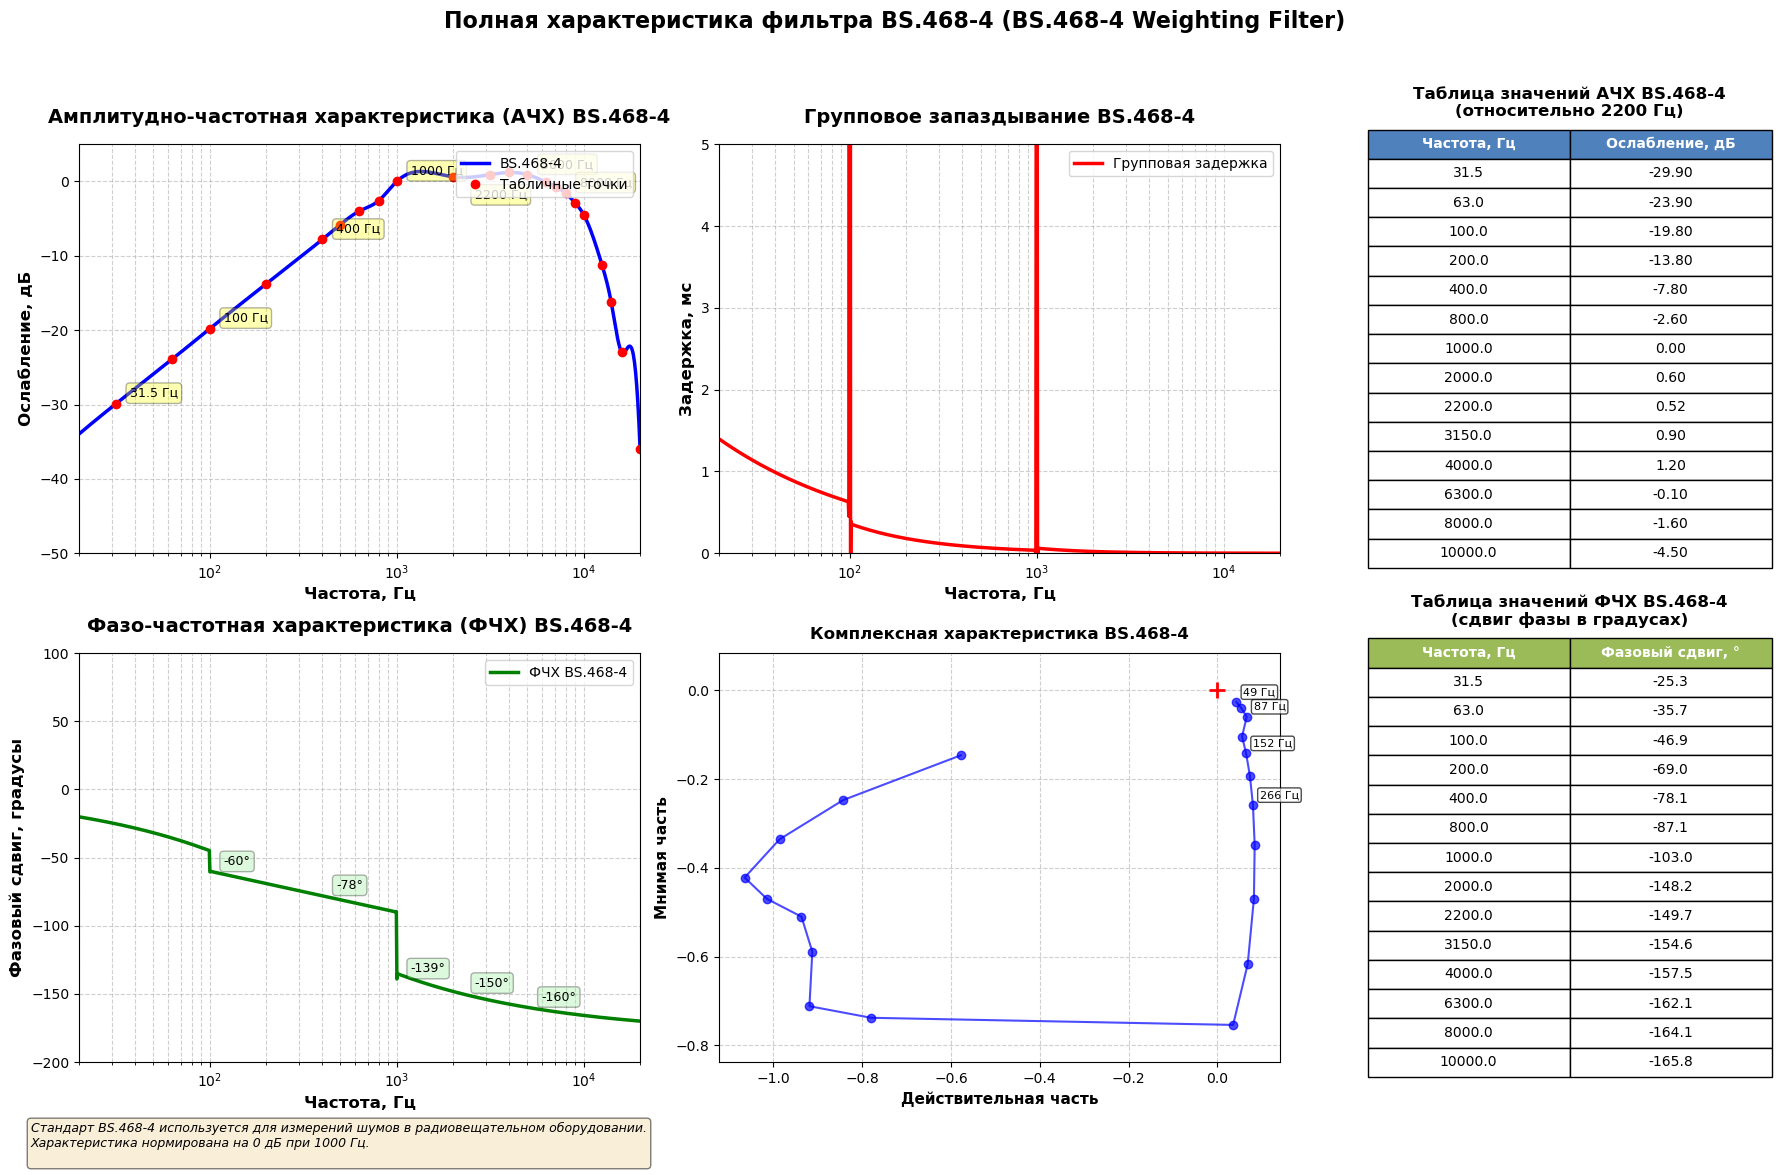


ТАБЛИЧНЫЕ ЗНАЧЕНИЯ ХАРАКТЕРИСТИК BS.468-4
Частота (Гц)    АЧХ (дБ)        ФЧХ (°)         Задержка (мс)  
--------------------------------------------------------------------------------
31.5            -29.90          -25.3           0.000          
63.0            -23.90          -35.7           0.877          
100.0           -19.80          -46.9           0.675          
200.0           -13.80          -69.0           0.289          
400.0           -7.80           -78.1           0.084          
800.0           -2.60           -87.1           0.116          
1000.0          0.00            -103.0          0.141          
2000.0          0.60            -148.2          0.108          
2200.0          0.52            -149.7          0.016          
3150.0          0.90            -154.6          0.012          
4000.0          1.20            -157.5          0.007          
6300.0          -0.10           -162.1          0.005          
8000.0          -1.60           -164.1      

In [5]:
#plot = create_simple_plot_with_tables()
plot_bs468_response_with_tables()

# Построение модели

## Подготовка данных

### АЧХ и ФЧХ фильтра BS.468-4

ТОЧНАЯ ХАРАКТЕРИСТИКА BS.468-4 НА ОСНОВЕ ТАБЛИЧНЫХ ДАННЫХ
Опорная частота: 1000 Гц = 0 дБ
Тип интерполяции: Кубические сплайны в логарифмической шкале
ТОЧНАЯ ПРОВЕРКА ТАБЛИЧНЫХ ЗНАЧЕНИЙ BS.468-4
Частота, Гц Табличное, дБ   Расчетное, дБ   Ошибка, дБ  
--------------------------------------------------------------------------------
31.5       -29.9           -29.900         0.000        ✓
63.0       -23.9           -23.900         0.000        ✓
100.0      -19.8           -19.800         0.000        ✓
200.0      -13.8           -13.800         0.000        ✓
400.0      -7.8            -7.800          0.000        ✓
500.0      -5.8            -5.800          0.000        ✓
630.0      -4.0            -4.000          0.000        ✓
800.0      -2.6            -2.600          0.000        ✓
1000.0     0.0             0.000           0.000        ✓
2000.0     0.6             0.600           0.000        ✓
3150.0     0.9             0.900           0.000        ✓
4000.0     1.2             1.

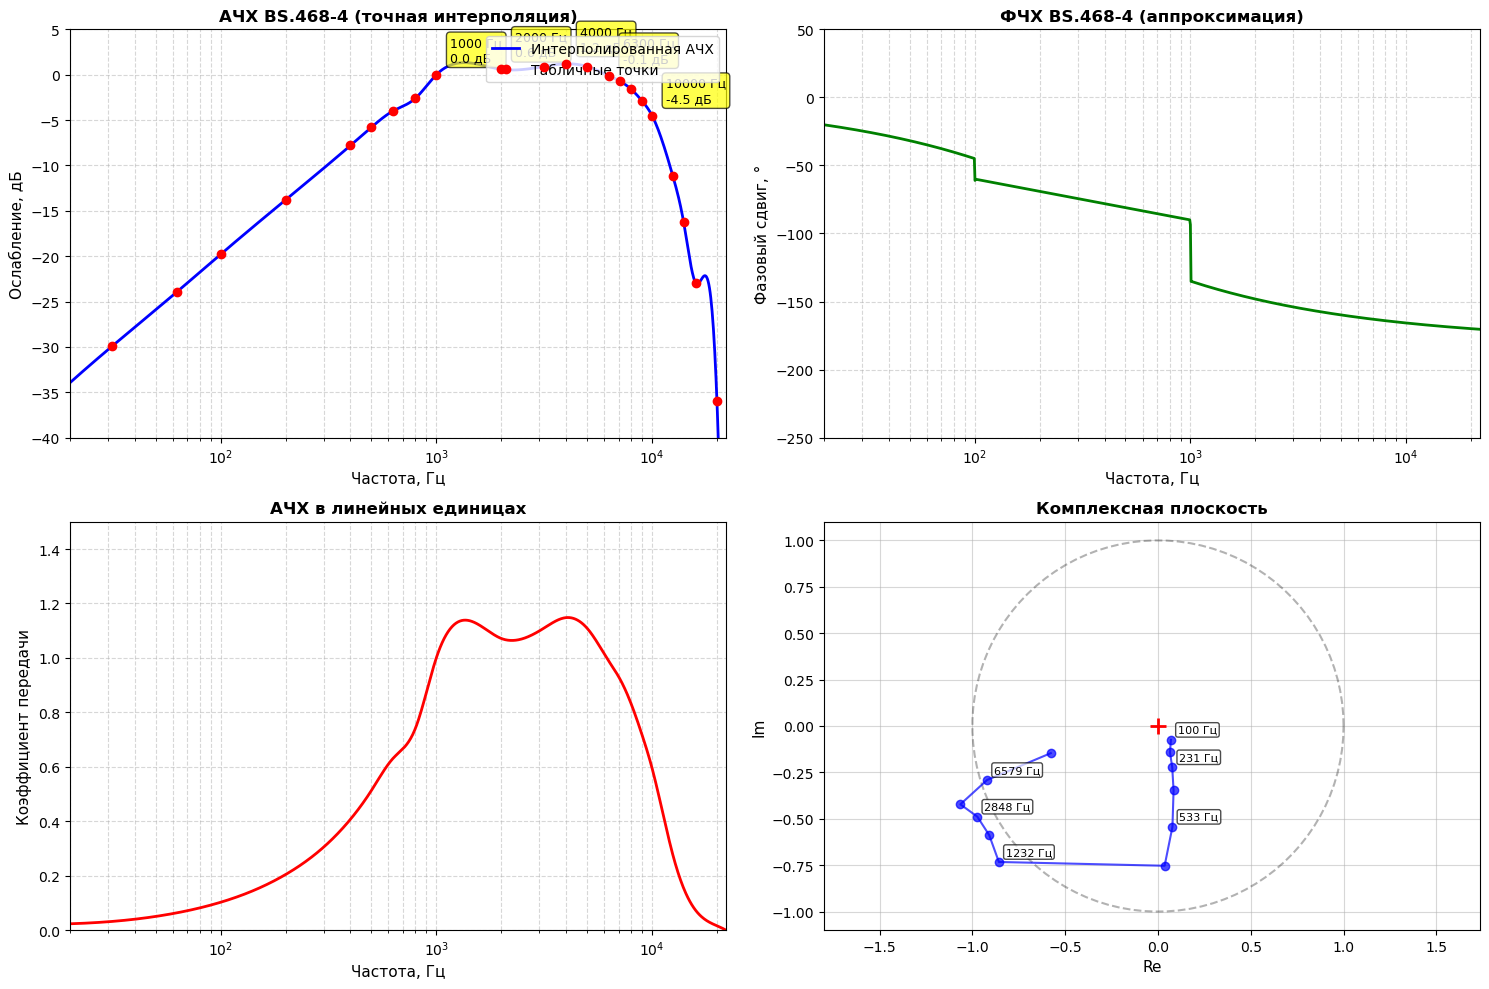


КАЛИБРОВОЧНАЯ ТАБЛИЦА BS.468-4
Частота  АЧХ (дБ)     Коэф. передачи     ФЧХ (°)      В таблице 
----------------------------------------------------------------------------------------------------
31.5     -29.900      0.031989           -25.3        Да         
63.0     -23.900      0.063826           -35.7        Да         
100.0    -19.800      0.102329           -46.9        Да         
200.0    -13.800      0.204174           -69.0        Да         
400.0    -7.800       0.407380           -78.1        Да         
500.0    -5.800       0.512861           -81.0        Да         
630.0    -4.000       0.630957           -84.0        Да         
800.0    -2.600       0.741310           -87.1        Да         
1000.0   0.000        1.000000           -103.0       Да         ← опорная
1500.0   1.230        1.130596           -143.3                  
2000.0   0.600        1.071519           -148.2       Да         ← ключевая
2500.0   0.566        1.070050           -151.5          

In [2]:
print("ТОЧНАЯ ХАРАКТЕРИСТИКА BS.468-4 НА ОСНОВЕ ТАБЛИЧНЫХ ДАННЫХ")
print("=" * 70)
print("Опорная частота: 1000 Гц = 0 дБ")
print("Тип интерполяции: Кубические сплайны в логарифмической шкале")
print("=" * 70)
    
# Точная проверка
bs468 = verify_exact_values()
    
# Графики
bs468 = plot_accurate_response()
    
# Калибровочная таблица
bs468 = generate_calibration_table()
    
# Экспорт для проектирования
bs468, freqs, mag_db, phase_deg, complex_resp = export_for_filter_design()
    
# Дополнительная информация
print("\n" + "="*70)
print("ИНФОРМАЦИЯ ДЛЯ ПРОЕКТИРОВАНИЯ:")
print("="*70)
    
# Ключевые значения для проектирования КИХ-фильтра
design_freqs = [100, 400, 1000, 2000, 4000, 6300, 8000, 10000]
    
print("Ключевые точки для проектирования фильтра:")
for f in design_freqs:
    mag = bs468.get_magnitude_db(f)
    phase = bs468.get_phase_deg(f)
    mag_lin = 10 ** (mag / 20)
        
    print(f"  {f:5} Гц: АЧХ = {mag:6.2f} дБ (K={mag_lin:.4f}), "
              f"ФЧХ = {phase:7.1f}°")
    
print("\nДля проектирования КИХ-фильтра методом частотной выборки:")
print("1. Используйте массив complex_response")
print("2. Примените обратное ДПФ")
print("3. Используйте окно (Хэмминга, Ханна)")
    


In [4]:
# Пример сравнения
freqs = np.logspace(1, 4, 1000)  # 10 Гц - 10 кГц

p53_response = weighting_filter_response('p53', freqs)
bs468_response = weighting_filter_response('bs468', freqs)

# Найдем коэффициенты передачи на 1 кГц для сравнения
print(f"На 1000 Гц:")
print(f"  P.53: {p53_response[freqs==1000][0]:.2f} дБ (Ku={10**(p53_response[freqs==1000][0]/20):.3f})")
print(f"  BS.468-4: {bs468_response[freqs==1000][0]:.2f} дБ (Ku={10**(bs468_response[freqs==1000][0]/20):.3f})")

На 1000 Гц:
  P.53: 0.20 дБ (Ku=1.023)
  BS.468-4: -3.60 дБ (Ku=0.661)


In [2]:
# Создание объекта
bs468 = BS468ReferenceResponse()

# Получение значений для частоты
freq = 1000  # Гц
mag_db = bs468.get_magnitude_db(freq)    # АЧХ в дБ
phase_deg = bs468.get_phase_deg(freq)    # ФЧХ в градусах

# Получение для массива частот
freqs = [100, 400, 410, 1000, 2200, 10000]
mag_array = bs468.get_magnitude_db(freqs)
phase_array = bs468.get_phase_deg(freqs)
print(mag_array)
print(phase_array)

[-19.8         -7.8         -7.57929571   0.           0.5212685
  -4.5       ]
[ -46.88608098  -78.06179974  -78.3835157  -103.0353128  -149.66100619
 -165.76975053]


### Создание датасета

Сначала сформируем входные сигналы. Это будут синусоиды различных частот (freq) в диаппазоне 30 - 20000 Гц. Затем, дискретизируем каждый синусоидальный входной сигнал с частотой дискретизации freq_descr = 48 кГц. Далее, сформируем наш датасет с признаками (128 признаков). Для этого, будем брать 128 последовательно расположенных отсчета (результат дискретизации) и это будет одна строка наших признаков.<br>
Число строк с признаками для каждой частоты входного сигнала будем задавать переменной (min_num_string_features).  

In [3]:
def get_descret_for_freq(freq_descr, freq, fi, num_features, min_num_string_features, k_f, fi_f):
    """
    Вычисление синусоидальных признаков и меток.
    
    Args:
        k_values: массив временных отсчётов
        freq: частота сигнала (Гц)
        freq_descr: частота дискретизации (Гц)
        fi: начальная фаза для X (радианы)
        num_features: количество признаков в одном векторе
        k_f: коэффициент амплитуды для y
        fi_f: дополнительный фазовый сдвиг для y (радианы)
        values_X: одномерный массив входного сигнала

    Returns:
        arr_features: 2-мерный массив значений входного сигнала - датасет признаков
        values_y: вычисленные значения сигнала - массив с ответами (целевая переменная)
    """    
    # Вычисляем кол-во строк параметров
    min_num_samples = min_num_string_features + num_features - 1 
    if min_num_samples > np.ceil(freq_descr / freq):
        num_samples = min_num_samples 
    else:           
        num_samples = np.ceil(freq_descr / freq) + num_features      
    
    # Создаем массив индексов k
    k_values = np.arange(num_samples)

    # Угловая частота в дискретной области
    omega = 2 * np.pi * freq / freq_descr
    
    # Вычисление значений для X (все точки)
    values_X = np.sin(omega * k_values + fi)
    
    # Вычисление значений для y (только последние точки каждого feature-вектора)
    feature_end_indices = k_values[num_features - 1::1]
    phase_y = fi + fi_f
    values_y = k_f * np.sin(omega * feature_end_indices + phase_y)

    # Преобразуем в 2D массив
    arr_features = np.vstack([values_X[i:i+num_features] for i in range(len(values_X)-(num_features-1))])
    
    return arr_features, values_y

def combine_frequencies_dynamic(freq_descr, freq_list, fi_list, num_features, min_num_string_features, k_f_list, fi_f_list):
    """
    Динамическое добавление строк в общий массив
    """
    # Создаем пустой массив с нужным количеством столбцов
    result_X = np.empty((0, num_features))
    result_y = np.array([])
    
    for freq, fi, k_f, fi_f in zip(freq_list, fi_list, k_f_list, fi_f_list):    
        arr_X, arr_y = get_descret_for_freq(freq_descr, freq, fi, num_features, min_num_string_features, k_f, fi_f)
        # Добавляем строки текущей частоты в общий массив
        result_X = np.vstack((result_X, arr_X))
        result_y = np.hstack((result_y, arr_y))
    
    column_names = [f'x{i+1}' for i in range(result_X.shape[1])]
    df_X = pd.DataFrame(result_X, columns=column_names)
    df_y = pd.DataFrame({'target': result_y})

    #return result_X, result_y
    return df_X, df_y

# Визуализация
def plot_input_output_signal(samples_num, df_X, df_y, in_column_name='x128',out_column_name='target'):
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    x_values = np.arange(samples_num)
    y1 = df_X[in_column_name].iloc[:samples_num].values
    y2 = df_y[out_column_name].iloc[:samples_num].values

    # Входной сигнал
    ax1.plot(x_values, y1, 'b-', linewidth=1, alpha=0.7, label='Вх.сигнал')
    ax1.scatter(x_values, y1, s=20, c='blue', alpha=0.5, marker='o')
    ax1.set_ylabel('Амплитуда', fontsize=12, fontweight='bold')
    ax1.set_title('Входной сигнал', fontsize=14, fontweight='bold')
    ax1.grid(True, linestyle='--', alpha=0.5)
    ax1.axhline(y=0, color='black', linewidth=0.5, alpha=0.5)
    ax1.fill_between(x_values, y1, 0, alpha=0.2, color='blue')
    ax1.set_ylim(-1.1, 1.1)
    ax1.legend()

    # Выходной сигнал
    ax2.plot(x_values, y2, 'r-', linewidth=1, alpha=0.7, label='Вых.сигнал')
    ax2.scatter(x_values, y2, s=20, c='red', alpha=0.5, marker='s')
    ax2.set_xlabel('Порядковый номер отсчета', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Амплитуда', fontsize=12, fontweight='bold')
    ax2.set_title('Выходной сигнал', fontsize=14, fontweight='bold')
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax2.axhline(y=0, color='black', linewidth=0.5, alpha=0.5)
    ax2.fill_between(x_values, y2, 0, alpha=0.2, color='red')
    ax2.set_ylim(-1.1, 1.1)
    ax2.legend()

    plt.tight_layout()
    plt.show()    


(254, 128)
(254, 1)


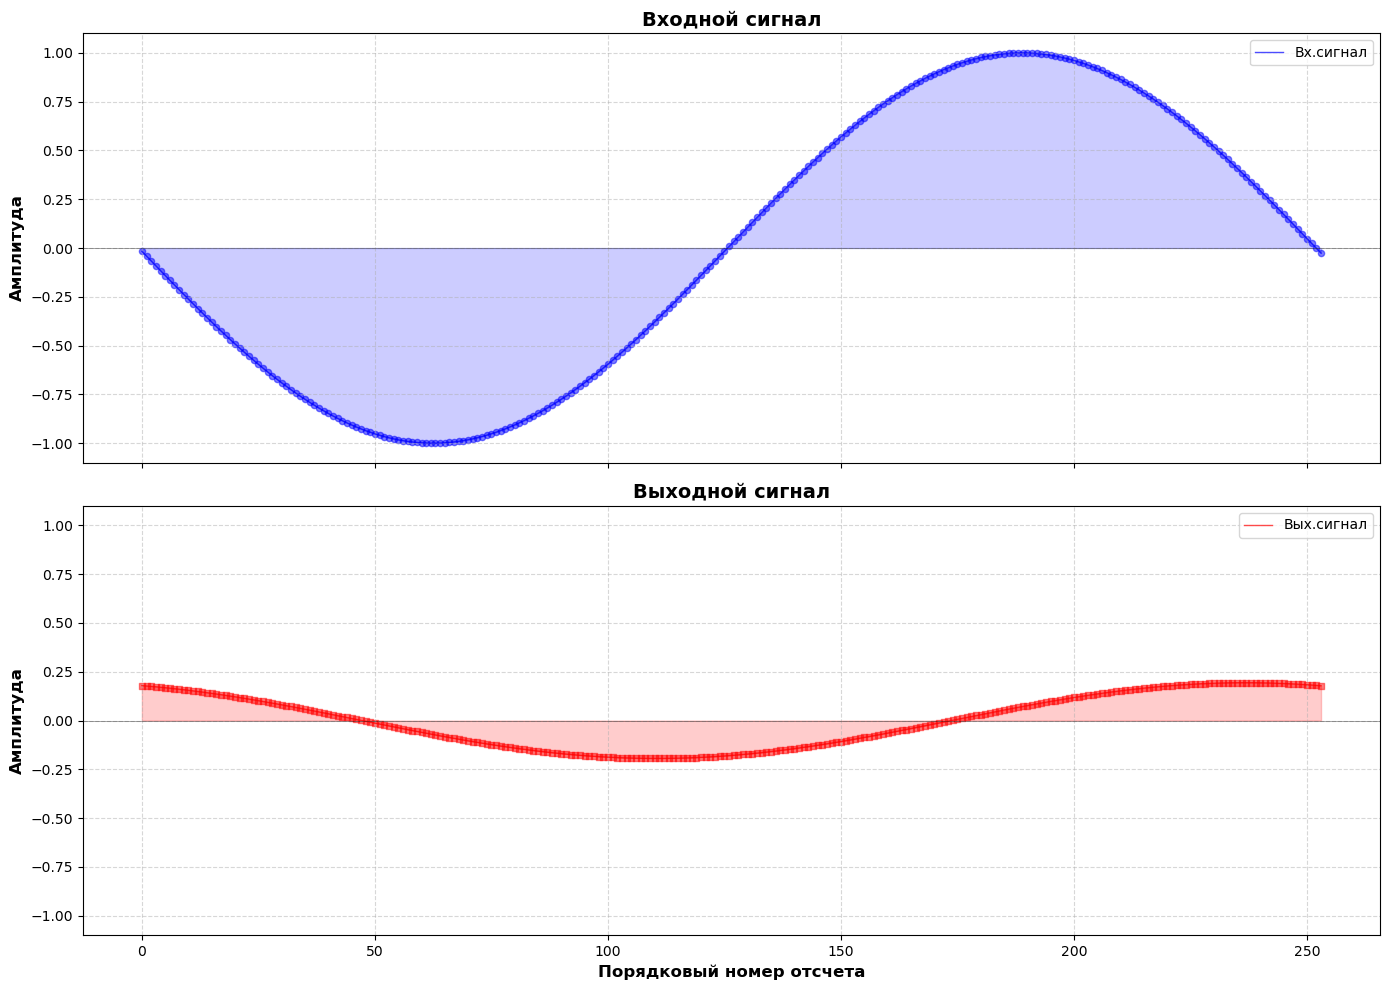

In [23]:
# Проверка
bs468_expl = BS468ReferenceResponse()
freqs_expl = [190]
fi_expl = [0]
mag_array_expl = bs468_expl.get_magnitude_linear(freqs_expl)
phase_array_expl = bs468_expl.get_phase_rad(freqs_expl)
df_X_expl, df_y_expl = combine_frequencies_dynamic(48000, freqs_expl, fi_expl, 128, 40, mag_array_expl, phase_array_expl)

print(df_X_expl.shape)
print(df_y_expl.shape)

plot_input_output_signal(254, df_X_expl, df_y_expl, in_column_name='x128',out_column_name='target')

In [4]:
bs468 = BS468ReferenceResponse()
freqs_train = [33,61,75,85,145,185,250,350,445,485,530,610,690,770,860,990,1100,1900,2100,2900,3100,3200,3900,4100,
               4900,5100,6100,6500,7000,7300,7900,8100,8900,9100,9900,10100,12100,12700,13900,14300,15900,16500,19900]
fi_train = [0] * 43
mag_array_train = bs468.get_magnitude_linear(freqs_train)
phase_array_train = bs468.get_phase_rad(freqs_train)
X_train, y_train = combine_frequencies_dynamic(200000, freqs_train, fi_train, 128, 40, mag_array_train, phase_array_train)
X_train.to_csv('./data/processed/X_train.csv', index=False)
y_train.to_csv('./data/processed/y_train.csv', index=False)

freqs_test = [31,63,100,200,400,500,630,800,1000,2000,3150,4000,5000,6300,7100,8000,9000,10000,12500,14000,16000,20000]
fi_test = [0] * 22
mag_array_test = bs468.get_magnitude_linear(freqs_test)
phase_array_test = bs468.get_phase_rad(freqs_test)
X_test, y_test = combine_frequencies_dynamic(200000, freqs_test, fi_test, 128, 40, mag_array_test, phase_array_test)
X_test.to_csv('./data/processed/X_test.csv', index=False)
y_test.to_csv('./data/processed/y_test.csv', index=False)

## Обучение модели линейной регрессии для нахождения коэффициентов КИХ-фильтра

In [13]:
X_train = pd.read_csv('./data/processed/X_train.csv')
y_train = pd.read_csv('./data/processed/y_train.csv')
X_test = pd.read_csv('./data/processed/X_test.csv')
y_test = pd.read_csv('./data/processed/y_test.csv')
#X_train_copy.head()

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

#from tabulate import tabulate

#model=LinearRegression(fit_intercept=False).fit(X_train,y_train)
model= Ridge(alpha=1.0).fit(X_train,y_train)

predict    = model.predict(X_test)
predict_tr = model.predict(X_train)
"""
r2_test    = model.score(X_test, y_test)
r2_train   = model.score(X_train, y_train)
MAE_test   = mean_absolute_error(y_test, predict)
MSE_test   = np.sqrt(np.mean((predict - y_test)**2))

#MAPE_test  = np.mean(np.abs((y_test - predict) / y_test)) * 100

cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')
ret_r2_cv = cv_scores.mean()
ret_r2_std = cv_scores.std()
ret_r2_str = f'{ret_r2_cv:.4f} (+/-{ret_r2_std:.4f})'
print(ret_r2_str)
"""

if hasattr(y_test, 'values'):
    y_test_array = y_test.values.ravel()  # Преобразуем DataFrame в 1D массив
else:
    y_test_array = y_test

if hasattr(y_train, 'values'):
    y_train_array = y_train.values.ravel()  # Преобразуем DataFrame в 1D массив
else:
    y_train_array = y_train

# Теперь вычисляем метрики
r2_test = r2_score(y_test_array, predict)
r2_train = r2_score(y_train_array, predict_tr)
MAE_test = mean_absolute_error(y_test_array, predict)
MSE_test = mean_squared_error(y_test_array, predict)
RMSE_test = np.sqrt(MSE_test)
MAPE_test  = np.mean(np.abs((y_test_array - predict) / y_test_array)) * 100

cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')
ret_r2_cv = cv_scores.mean()
ret_r2_std = cv_scores.std()
ret_r2_str = f'{ret_r2_cv:.4f} (+/-{ret_r2_std:.4f})'
print(ret_r2_str)

-0.2089 (+/-0.8668)


In [25]:
def print_model_results():
    """Красивый вывод результатов модели"""
    
    # Определяем цветовую кодировку для R²
    def get_r2_color(r2):
        if r2 > 0.9:
            return "🟢"  # зеленый
        elif r2 > 0.7:
            return "🟡"  # желтый
        elif r2 > 0.5:
            return "🟠"  # оранжевый
        else:
            return "🔴"  # красный
    
    # Определяем цвет для MAPE
    def get_mape_color(mape):
        if mape < 10:
            return "🟢"
        elif mape < 20:
            return "🟡"
        elif mape < 50:
            return "🟠"
        else:
            return "🔴"
    
    print("\n" + "="*40)
    print("           РЕЗУЛЬТАТЫ ЛИНЕЙНОЙ РЕГРЕССИИ")
    #print("📈"*40)
    
    print(f"\n{'='*60}")
    print(f"{'МЕТРИКА':<25} {'ЗНАЧЕНИЕ':<15} {'ОЦЕНКА':<20}")
    print(f"{'='*60}")
    
    print(f"{'R² (тест)':<25} {r2_test:<15.4f} {get_r2_color(r2_test):<2} {'Высокое' if r2_test > 0.7 else 'Среднее' if r2_test > 0.5 else 'Низкое'}")
    print(f"{'R² (обучение)':<25} {r2_train:<15.4f} {get_r2_color(r2_train):<2} {'Высокое' if r2_train > 0.7 else 'Среднее' if r2_train > 0.5 else 'Низкое'}")
    print(f"{'Разница R²':<25} {(r2_train - r2_test):<15.4f} {'✓' if abs(r2_train - r2_test) < 0.1 else '⚠'} {'Нет переобуч.' if abs(r2_train - r2_test) < 0.1 else 'Возм. переобуч.'}")
    print(f"{'-'*60}")
    print(f"{'MAE (тест)':<25} {MAE_test:<15.4f} {'↓ Лучше'}")
    print(f"{'RMSE (тест)':<25} {MSE_test:<15.4f} {'↓ Лучше'}")
    print(f"{'MAPE (тест)':<25} {MAPE_test:<15.2f}% {get_mape_color(MAPE_test):<2} {'Точно' if MAPE_test < 10 else 'Приемлемо' if MAPE_test < 20 else 'Неточно'}")
    print(f"{'='*60}")

In [28]:
print_model_results()


           РЕЗУЛЬТАТЫ ЛИНЕЙНОЙ РЕГРЕССИИ

МЕТРИКА                   ЗНАЧЕНИЕ        ОЦЕНКА              
R² (тест)                 0.9166          🟢  Высокое
R² (обучение)             0.9447          🟢  Высокое
Разница R²                0.0280          ✓ Нет переобуч.
------------------------------------------------------------
MAE (тест)                0.0260          ↓ Лучше
RMSE (тест)               0.0030          ↓ Лучше
MAPE (тест)               271.44         % 🔴  Неточно


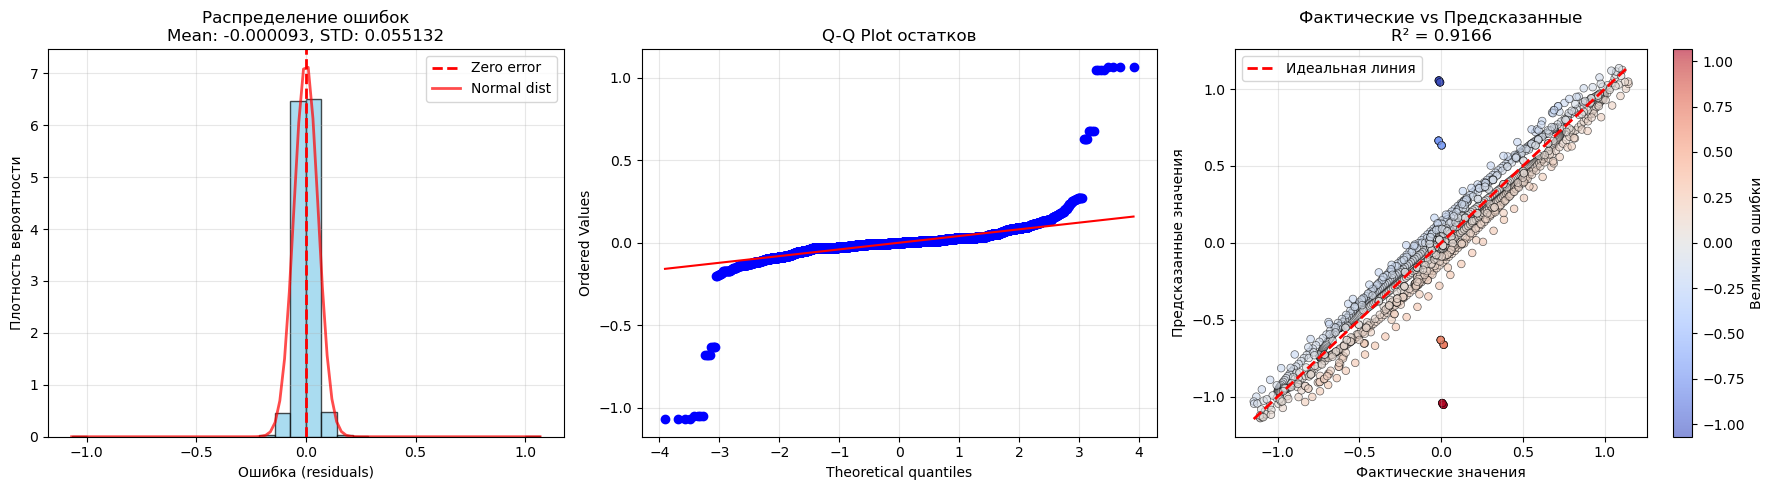


📊 СТАТИСТИКА ОШИБОК:
Метрика                   Значение            
Средняя ошибка            -0.000093           
Медианная ошибка          -0.000582           
Стандартное отклонение    0.055132            
Средняя абсолютная ошибка 0.025953            
Min ошибка                -1.069701           
Max ошибка                1.068235            
Диапазон (95%)            [-0.085691, 0.087255]
Skewness                  0.137316            
Kurtosis                  168.018179          


In [29]:


def analyze_residuals(y_test, predict):
    """Анализ и визуализация остатков модели"""
    
    # Преобразуем все в numpy arrays для надежности
    if isinstance(y_test, pd.Series) or isinstance(y_test, pd.DataFrame):
        y_test_array = y_test.values.flatten()
    else:
        y_test_array = np.array(y_test).flatten()
        
    if isinstance(predict, pd.Series) or isinstance(predict, pd.DataFrame):
        predict_array = predict.values.flatten()
    else:
        predict_array = np.array(predict).flatten()
    
    # Вычисляем остатки
    residuals = y_test_array - predict_array
    
    # Создаем графики
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Гистограмма остатков
    axes[0].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='skyblue', density=True)
    axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero error')
    
    # Добавляем нормальное распределение для сравнения
    from scipy import stats
    x = np.linspace(residuals.min(), residuals.max(), 100)
    normal_pdf = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))
    axes[0].plot(x, normal_pdf, 'r-', linewidth=2, alpha=0.7, label='Normal dist')
    
    axes[0].set_xlabel('Ошибка (residuals)')
    axes[0].set_ylabel('Плотность вероятности')
    axes[0].set_title(f'Распределение ошибок\nMean: {np.mean(residuals):.6f}, STD: {np.std(residuals):.6f}')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 2. Q-Q plot для проверки нормальности
    stats.probplot(residuals, dist="norm", plot=axes[1])
    axes[1].set_title('Q-Q Plot остатков')
    axes[1].grid(True, alpha=0.3)
    
    # 3. Фактические vs Предсказанные значения
    axes[2].scatter(y_test_array, predict_array, alpha=0.6, s=30, 
                   c=residuals, cmap='coolwarm', edgecolors='black', linewidth=0.5)
    
    # Линия идеального прогноза
    min_val = min(y_test_array.min(), predict_array.min())
    max_val = max(y_test_array.max(), predict_array.max())
    axes[2].plot([min_val, max_val], [min_val, max_val], 
                'r--', linewidth=2, label='Идеальная линия')
    
    axes[2].set_xlabel('Фактические значения')
    axes[2].set_ylabel('Предсказанные значения')
    axes[2].set_title(f'Фактические vs Предсказанные\nR² = {r2_test:.4f}')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    # Добавляем colorbar для остатков
    plt.colorbar(axes[2].collections[0], ax=axes[2], label='Величина ошибки')
    
    plt.tight_layout()
    plt.show()
    
    # Выводим статистику
    print_stats(residuals)
    
    return residuals

def print_stats(residuals):
    """Вывод статистики остатков"""
    print(f"\n📊 СТАТИСТИКА ОШИБОК:")
    print(f"{'='*50}")
    print(f"{'Метрика':<25} {'Значение':<20}")
    print(f"{'='*50}")
    print(f"{'Средняя ошибка':<25} {np.mean(residuals):<20.6f}")
    print(f"{'Медианная ошибка':<25} {np.median(residuals):<20.6f}")
    print(f"{'Стандартное отклонение':<25} {np.std(residuals):<20.6f}")
    print(f"{'Средняя абсолютная ошибка':<25} {np.mean(np.abs(residuals)):<20.6f}")
    print(f"{'Min ошибка':<25} {np.min(residuals):<20.6f}")
    print(f"{'Max ошибка':<25} {np.max(residuals):<20.6f}")
    print(f"{'Диапазон (95%)':<25} [{np.percentile(residuals, 2.5):.6f}, {np.percentile(residuals, 97.5):.6f}]")
    print(f"{'Skewness':<25} {stats.skew(residuals):<20.6f}")
    print(f"{'Kurtosis':<25} {stats.kurtosis(residuals):<20.6f}")
    print(f"{'='*50}")
    
    # Проверка на нормальность (тест Шапиро-Уилка)
    if len(residuals) <= 5000:  # Shapiro-Wilk работает до 5000 наблюдений
        
        shapiro_stat, shapiro_p = stats.shapiro(residuals)
        print(f"{'Shapiro-Wilk test':<25} p-value: {shapiro_p:.6f}")
        if shapiro_p > 0.05:
            print("✅ Ошибки распределены нормально (p > 0.05)")
        else:
            print("⚠ Ошибки не распределены нормально (p ≤ 0.05)")

# Использование
residuals = analyze_residuals(y_test, predict)

C:\Users\543\AppData\Local\Temp\ipykernel_33444\489775629.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, y_pred, 's-', color='#ff7f0e', linewidth=1.5, markersize=4,


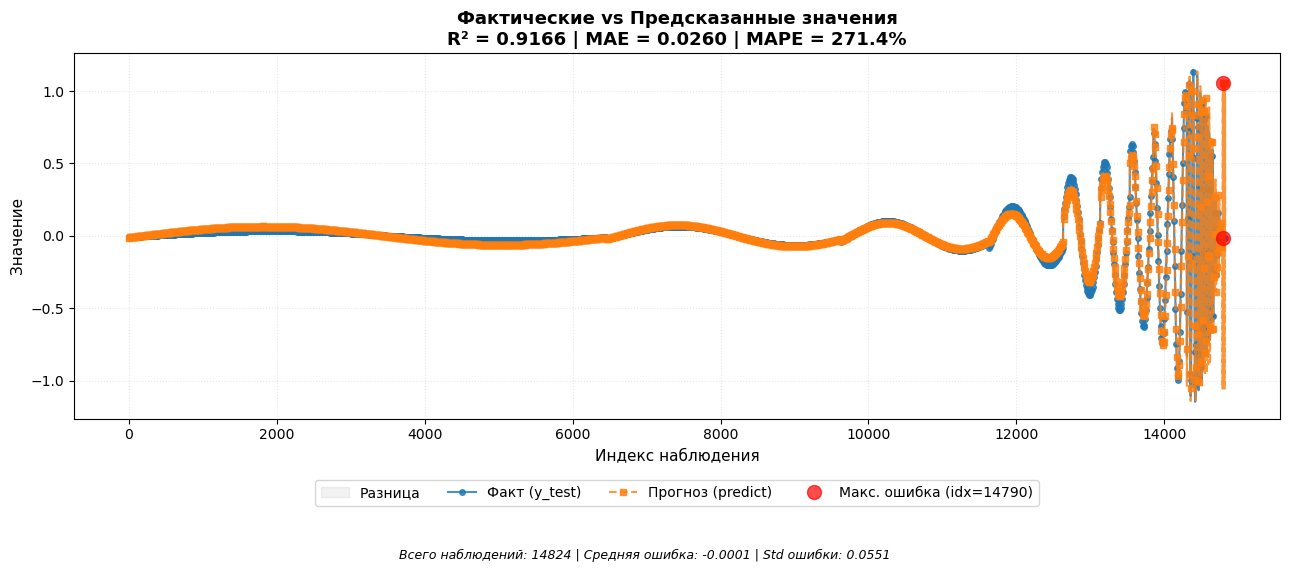

In [30]:
plt.figure(figsize=(13, 6))

# Данные
x = np.arange(len(y_test))
y_actual = np.array(y_test).flatten()
y_pred = np.array(predict).flatten()

# Рисуем основную область
plt.fill_between(x, y_actual, y_pred, alpha=0.1, color='gray', label='Разница')

# Кривые
plt.plot(x, y_actual, 'o-', color='#1f77b4', linewidth=1.5, markersize=4, 
         alpha=0.8, label='Факт (y_test)', markevery=10)
plt.plot(x, y_pred, 's-', color='#ff7f0e', linewidth=1.5, markersize=4, 
         alpha=0.8, label='Прогноз (predict)', markevery=10, linestyle='--')

# Выделяем точку с максимальной ошибкой
max_err_idx = np.argmax(np.abs(y_actual - y_pred))
plt.plot(max_err_idx, y_actual[max_err_idx], 'ro', markersize=10, alpha=0.7, 
         label=f'Макс. ошибка (idx={max_err_idx})')
plt.plot(max_err_idx, y_pred[max_err_idx], 'ro', markersize=10, alpha=0.7)

# Настройки
plt.xlabel('Индекс наблюдения', fontsize=11)
plt.ylabel('Значение', fontsize=11)
plt.title(f'Фактические vs Предсказанные значения\n'
          f'R² = {r2_test:.4f} | MAE = {MAE_test:.4f} | MAPE = {MAPE_test:.1f}%', 
          fontsize=13, fontweight='bold')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=10)
plt.grid(True, alpha=0.3, linestyle=':')

# Добавляем подпись внизу
plt.figtext(0.5, 0.01, f'Всего наблюдений: {len(y_test)} | '
            f'Средняя ошибка: {np.mean(y_actual - y_pred):.4f} | '
            f'Std ошибки: {np.std(y_actual - y_pred):.4f}', 
            ha='center', fontsize=9, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

# Проверка характеристик псофометрического фильтра